In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("auto-mpg.csv")

In [96]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,18.0,4,1.090604,0.716754,0.630870,-1.320595,0,0,0
1,15.0,4,1.503514,1.667422,0.854333,-1.506489,0,0,0
2,18.0,4,1.196232,1.259993,0.550470,-1.692383,0,0,0
3,16.0,4,1.061796,1.259993,0.546923,-1.320595,0,0,0
4,17.0,4,1.042591,0.988374,0.565841,-1.878278,0,0,0


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
df['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [8]:
# Its a unique name does not add information hence not required for model building
df.drop(['car name'],axis=1,inplace=True)

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
df['horsepower']=df['horsepower'].replace('?',np.NAN)

In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [12]:
df['horsepower']=df['horsepower'].astype('float64')

In [13]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [14]:
df[df['cylinders']==4]['horsepower'].median()

78.0

In [15]:
df[df['cylinders']==6]['horsepower'].median()

100.0

In [16]:
df.loc[df['cylinders']==4,'horsepower']=df.loc[df['cylinders']==4,'horsepower'].fillna(78)
df.loc[df['cylinders']==6,'horsepower']=df.loc[df['cylinders']==6,'horsepower'].fillna(100)

In [17]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [18]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1


In [19]:
df['origin']=df['origin'].replace({1:'America',2:'Europe',3:'Asia'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


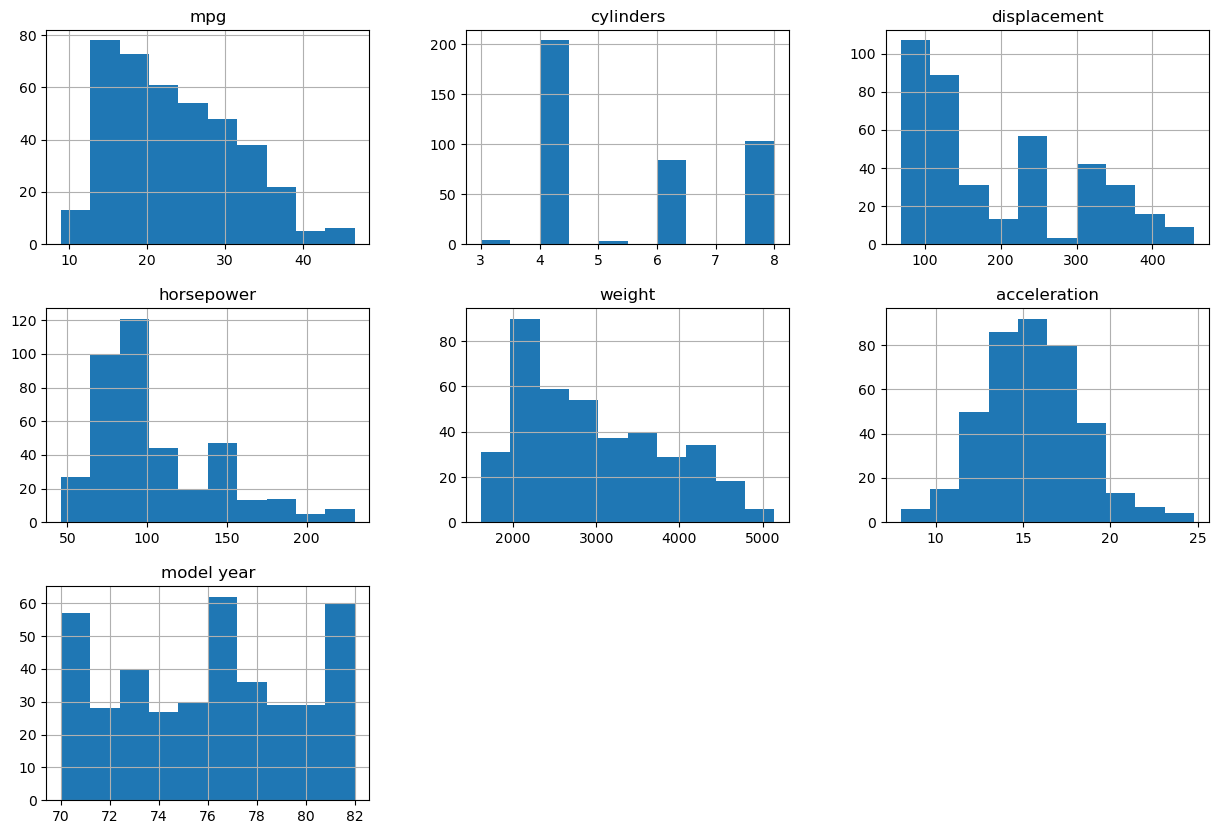

In [21]:
df.hist(figsize=(15,10));

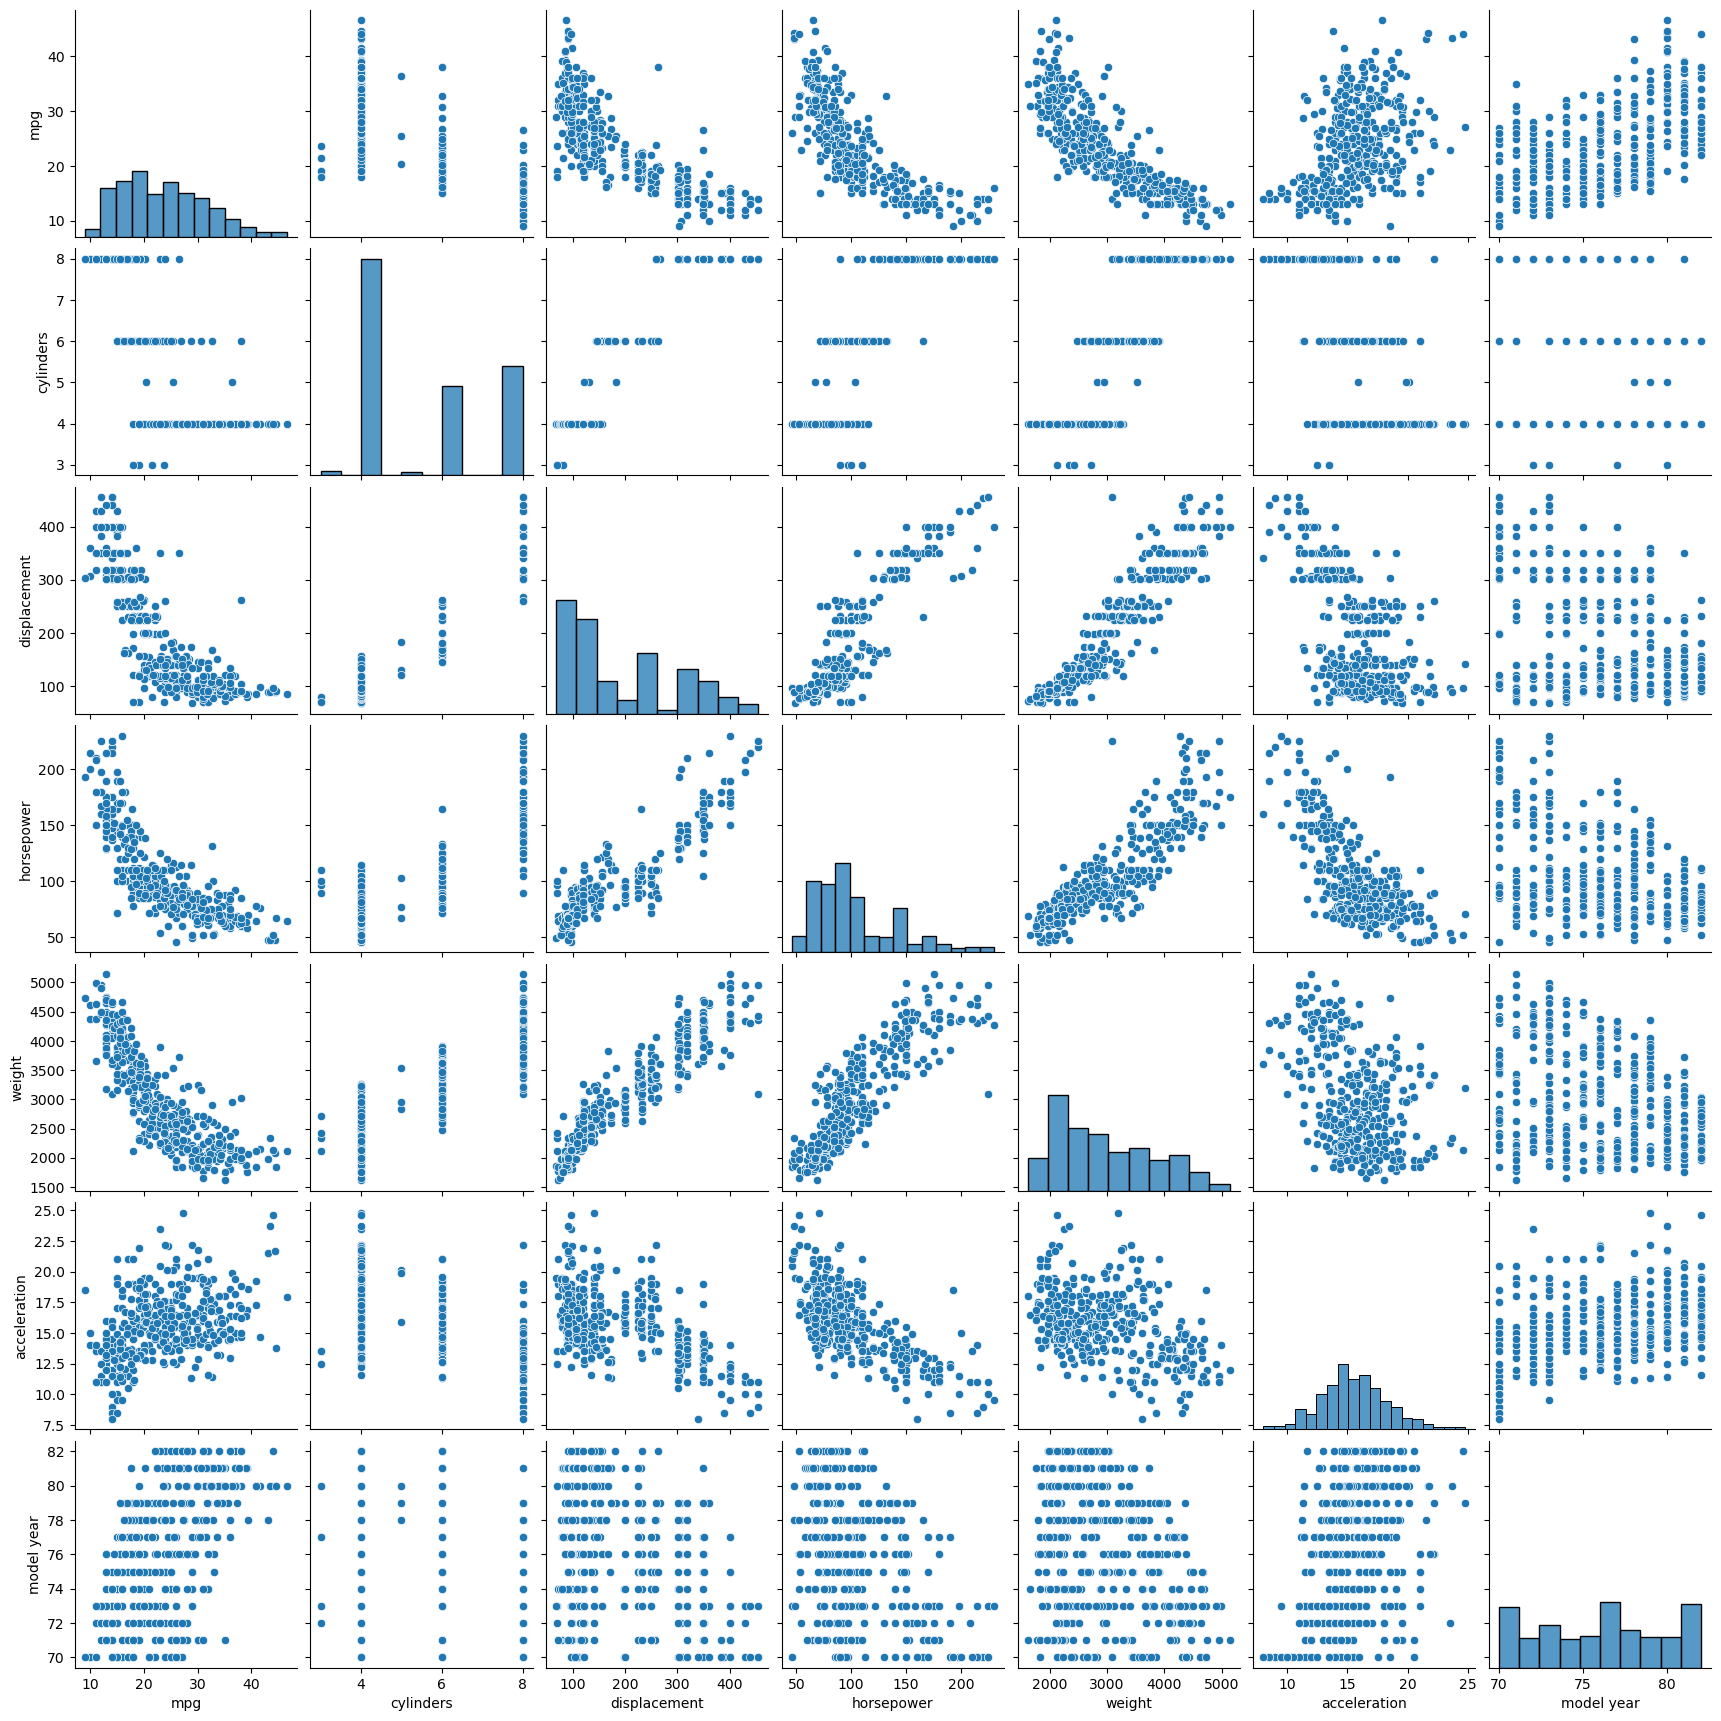

In [22]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='acceleration'>

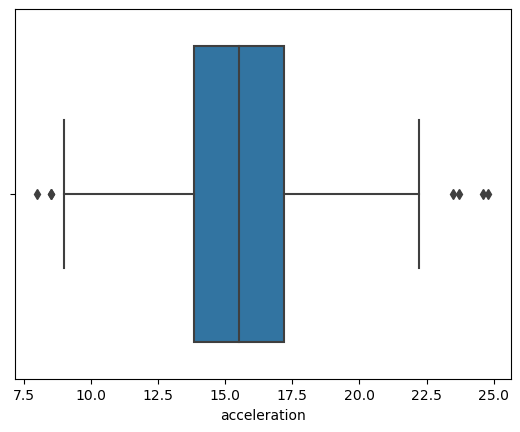

In [23]:
sns.boxplot(x='acceleration',data=df)

<AxesSubplot:xlabel='horsepower'>

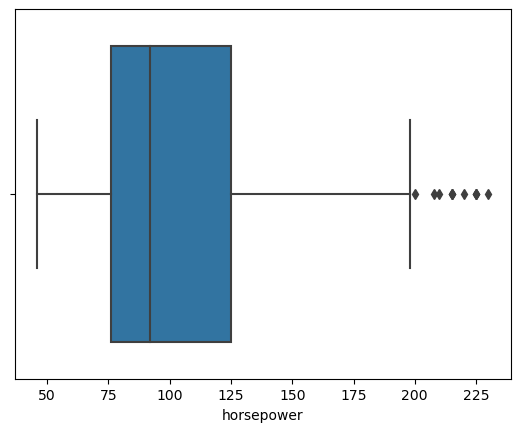

In [24]:
sns.boxplot(x='horsepower',data=df)

In [25]:
dups=df.duplicated()
df[dups]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [27]:
lracc,uracc=remove_outlier(df['acceleration'])
df['acceleration']=np.where(df['acceleration']>uracc,uracc,df['acceleration'])
df['acceleration']=np.where(df['acceleration']<lracc,lracc,df['acceleration'])
lrhp,urhp=remove_outlier(df['horsepower'])
df['horsepower']=np.where(df['horsepower']>urhp,urhp,df['horsepower'])
df['horsepower']=np.where(df['horsepower']<lrhp,lrhp,df['horsepower'])

<AxesSubplot:xlabel='horsepower'>

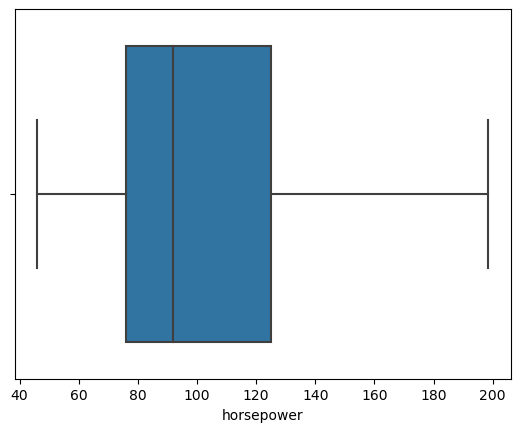

In [28]:
sns.boxplot(x='horsepower',data=df)

In [29]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [30]:
# Create Dummy var for 'origin'
df=pd.get_dummies(df,columns=['origin'],drop_first=True)

In [31]:
df['model year']=pd.Categorical(df['model year']).codes

In [32]:
df['cylinders']=pd.Categorical(df['cylinders']).codes

In [33]:
from scipy.stats import zscore

In [34]:
df[['displacement','horsepower','weight','acceleration']]=df[['displacement','horsepower','weight','acceleration']].apply(zscore)

In [99]:
df.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower    weight  acceleration  \
0    18.0          4      1.090604    0.716754  0.630870     -1.320595   
1    15.0          4      1.503514    1.667422  0.854333     -1.506489   
2    18.0          4      1.196232    1.259993  0.550470     -1.692383   
3    16.0          4      1.061796    1.259993  0.546923     -1.320595   
4    17.0          4      1.042591    0.988374  0.565841     -1.878278   
..    ...        ...           ...         ...       ...           ...   
393  27.0          1     -0.513026   -0.478371 -0.213324      0.017842   
394  44.0          1     -0.925936   -1.401877 -0.993671      2.471644   
395  32.0          1     -0.561039   -0.532695 -0.798585     -1.469311   
396  28.0          1     -0.705077   -0.668504 -0.408411      1.133207   
397  31.0          1     -0.714680   -0.587019 -0.296088      1.430637   

     model year  origin_Asia  origin_Europe  
0             0            0       

In [100]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,18.0,4,1.090604,0.716754,0.630870,-1.320595,0,0,0
1,15.0,4,1.503514,1.667422,0.854333,-1.506489,0,0,0
2,18.0,4,1.196232,1.259993,0.550470,-1.692383,0,0,0
3,16.0,4,1.061796,1.259993,0.546923,-1.320595,0,0,0
4,17.0,4,1.042591,0.988374,0.565841,-1.878278,0,0,0


In [36]:
# Separate Independent and dependent variable into x and y
# x will contain all the independent variables and y will have the dependent variable
X=df.drop(['mpg'],axis=1)
y=df[['mpg']]

In [37]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,4,1.090604,0.716754,0.630870,-1.320595,0,0,0
1,4,1.503514,1.667422,0.854333,-1.506489,0,0,0
2,4,1.196232,1.259993,0.550470,-1.692383,0,0,0
3,4,1.061796,1.259993,0.546923,-1.320595,0,0,0
4,4,1.042591,0.988374,0.565841,-1.878278,0,0,0


In [38]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [39]:
# Train Test split (70:30)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [40]:
X_train.shape

(278, 8)

In [41]:
X_test.shape

(120, 8)

In [42]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
350,1,-0.849116,-1.103096,-0.893172,-0.242410,11,0,0
59,1,-0.925936,-1.347553,-0.847061,2.471644,2,0,1
120,1,-0.695475,0.227840,-0.121101,-0.019337,3,0,1
12,4,1.983643,1.259993,0.934732,-2.250066,0,0,0
349,1,-0.983552,-0.967286,-1.165111,0.166557,11,1,0


In [43]:
# First approach using sklearn
from sklearn.linear_model import LinearRegression

In [44]:
regression_model=LinearRegression()

In [45]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [46]:
regression_model.coef_[0]

array([-1.24906132,  4.01022715, -1.49599715, -5.7578894 , -0.01484402,
        0.82008819,  2.53088805,  2.9742682 ])

In [47]:
for idx,col_name in enumerate(X_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for cylinders is -1.2490613244867814
The coeff for displacement is 4.0102271534072695
The coeff for horsepower is -1.495997151278866
The coeff for weight is -5.757889400140118
The coeff for acceleration is -0.01484402472233991
The coeff for model year is 0.8200881927892256
The coeff for origin_Asia is 2.5308880484445706
The coeff for origin_Europe is 2.9742682001865512


In [48]:
intercept=regression_model.intercept_[0]
intercept

20.42598202494969

In [49]:
# R square on the Train data
regression_model.score(X_train,y_train)

0.8199303032592258

In [50]:
#R square on the Test data
regression_model.score(X_test,y_test)

0.8450574836372762

In [51]:
predicted_train=regression_model.predict(X_train)
predicted_test=regression_model.predict(X_test)

In [52]:
# MSE on train data
mean_squared_error(y_train,predicted_train)

11.160240388579888

In [53]:
# RMSE on train data
RMSE_Train=np.sqrt(mean_squared_error(y_train,predicted_train))
RMSE_Train

3.340694596723844

In [54]:
mean_squared_error(y_train,predicted_train,squared=False)

3.340694596723844

In [55]:
# Linear Regression using stats model

In [56]:
# Concat X and y
data_train=pd.concat([X_train,y_train],axis=1)
data_test=pd.concat([X_test,y_test],axis=1)

In [57]:
data_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe,mpg
350,1,-0.849116,-1.103096,-0.893172,-0.242410,11,0,0,34.7
59,1,-0.925936,-1.347553,-0.847061,2.471644,2,0,1,23.0
120,1,-0.695475,0.227840,-0.121101,-0.019337,3,0,1,19.0
12,4,1.983643,1.259993,0.934732,-2.250066,0,0,0,15.0
349,1,-0.983552,-0.967286,-1.165111,0.166557,11,1,0,34.1


In [58]:
data_train.rename(columns={'model year':'model_year'},inplace=True)

In [59]:
data_test.rename(columns={'model year':'model_year'},inplace=True)

In [60]:
import statsmodels.formula.api as smf

In [61]:
expr='mpg ~ cylinders+displacement+horsepower+weight+acceleration+model_year+origin_Asia+origin_Europe'

In [62]:
lm1=smf.ols(formula=expr,data=data_train).fit()

In [63]:
# Fstat: All the coeff are 0
# Ha: All the coeff are not 0 atleast for one of the Ind variables
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     153.1
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.69e-95
Time:                        01:19:34   Log-Likelihood:                -729.78
No. Observations:                 278   AIC:                             1478.
Df Residuals:                     269   BIC:                             1510.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.4260      1.120     18.232

In [64]:
# p_value Interpretation
#H0: There is no relationship b/w the variable and the dependent variable
#Ha: There is relationship b/w the variable and the dependent variable

In [65]:
lm1.params

Intercept        20.425982
cylinders        -1.249061
displacement      4.010227
horsepower       -1.495997
weight           -5.757889
acceleration     -0.014844
model_year        0.820088
origin_Asia       2.530888
origin_Europe     2.974268
dtype: float64

In [66]:
# MSE on train
mean_squared_error(lm1.predict(data_train.drop('mpg',axis=1)),data_train['mpg'])

11.16024038857989

In [67]:
# RMSE on train
mean_squared_error(lm1.predict(data_train.drop('mpg',axis=1)),data_train['mpg'],squared=False)

3.3406945967238446

In [68]:
# MSE on test
mean_squared_error(lm1.predict(data_test.drop('mpg',axis=1)),data_test['mpg'])

9.059015065865953

In [69]:
# RMSE on test
mean_squared_error(lm1.predict(data_test.drop('mpg',axis=1)),data_test['mpg'],squared=False)

3.009819772987405

In [70]:
data_train.drop('acceleration',axis=1,inplace=True)
data_test.drop('acceleration',axis=1,inplace=True)

In [71]:
data_test.head()

,cylinders,displacement,horsepower,weight,model_year,origin_Asia,origin_Europe,mpg
174,3,-0.215346,-0.179590,0.016051,5,0,0,18.0
359,1,-0.503423,-0.641343,0.306908,11,0,1,28.1
250,4,1.196232,0.988374,0.903991,8,0,0,19.4
274,2,-0.599449,-0.016618,-0.166030,8,0,1,20.3
283,3,0.370411,-0.369723,0.348290,9,0,0,20.2


In [72]:
expr='mpg ~ cylinders+displacement+horsepower+weight+model_year+origin_Asia+origin_Europe'

In [73]:
lm2=smf.ols(formula=expr,data=data_train).fit()

In [74]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     175.6
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.23e-96
Time:                        01:19:34   Log-Likelihood:                -729.78
No. Observations:                 278   AIC:                             1476.
Df Residuals:                     270   BIC:                             1505.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.4271      1.118     18.271

In [75]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
count,398.000000,398.000000,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,398.000000,398.000000,398.000000
mean,23.514573,2.195980,-8.312725e-17,9.093787e-17,-9.902743e-17,-8.647466e-17,6.010050,0.198492,0.175879
std,7.815984,1.328541,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,3.697627,0.399367,0.381197
min,9.000000,0.000000,-1.204411e+00,-1.564849e+00,-1.604943e+00,-2.510317e+00,0.000000,0.000000,0.000000
25%,17.500000,1.000000,-8.563178e-01,-7.499903e-01,-8.828266e-01,-6.420819e-01,3.000000,0.000000,0.000000
50%,23.000000,1.000000,-4.314040e-01,-3.153993e-01,-1.973624e-01,-1.933672e-02,6.000000,0.000000,0.000000
75%,29.000000,4.000000,6.584879e-01,5.809448e-01,7.538337e-01,6.034085e-01,9.000000,0.000000,0.000000
max,46.600000,4.000000,2.511784e+00,2.577347e+00,2.565185e+00,2.471644e+00,12.000000,1.000000,1.000000


In [76]:
# predicting a new record
values=np.array([4,0.7,1.0,1.5,0.9,9,0,1])

In [77]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [78]:
LR.predict(values.reshape(1,-1))

array([[18.4457668]])

# Regularization of Linear Regression model

In [79]:
# Linear Regression Model
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [80]:
for idx,col_name in enumerate(X_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for cylinders is -1.2490613244867814
The coeff for displacement is 4.0102271534072695
The coeff for horsepower is -1.495997151278866
The coeff for weight is -5.757889400140118
The coeff for acceleration is -0.01484402472233991
The coeff for model year is 0.8200881927892256
The coeff for origin_Asia is 2.5308880484445706
The coeff for origin_Europe is 2.9742682001865512


In [81]:
predicted_train=regression_model.predict(X_train)
predicted_test=regression_model.predict(X_test)

In [82]:
regression_model.score(X_test,y_test)

0.8450574836372762

In [83]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [84]:
# Ridge Regression model-------L2
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [85]:
ridge_model.score(X_train,y_train)

0.819639516291447

In [86]:
# Lasso Regression model-------L1
Lasso_model=Lasso(alpha=0.1)
Lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [87]:
for idx,col_name in enumerate(X_train.columns):
    print('The coeff for {} is {}'.format(col_name,Lasso_model.coef_[idx]))

The coeff for cylinders is -0.29933277398627806
The coeff for displacement is 0.0
The coeff for horsepower is -0.3099213299420828
The coeff for weight is -4.760117108094546
The coeff for acceleration is -0.0
The coeff for model year is 0.7737271511416278
The coeff for origin_Asia is 0.44877354248001877
The coeff for origin_Europe is 0.753427764685994


In [88]:
Lasso_model.score(X_train,y_train)

0.8038287941076312

In [89]:
Lasso_model.score(X_test,y_test)

0.8388751783542635

# VIF-Variance Inflation Factor

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe
0,4,1.090604,0.716754,0.630870,-1.320595,0,0,0
1,4,1.503514,1.667422,0.854333,-1.506489,0,0,0
2,4,1.196232,1.259993,0.550470,-1.692383,0,0,0
3,4,1.061796,1.259993,0.546923,-1.320595,0,0,0
4,4,1.042591,0.988374,0.565841,-1.878278,0,0,0


In [92]:
X.values

array([[ 4.        ,  1.0906037 ,  0.71675448, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  1.5035143 ,  1.6674224 , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  1.19623199,  1.25999329, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.56103873, -0.53269479, ..., 12.        ,
         0.        ,  0.        ],
       [ 1.        , -0.70507731, -0.6685045 , ..., 12.        ,
         0.        ,  0.        ],
       [ 1.        , -0.71467988, -0.58701867, ..., 12.        ,
         0.        ,  0.        ]])

In [93]:
X.shape[1]

8

In [94]:
# Variable having VIF > 10 are cousing multicolinearity
VIF=[variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]
i=0
for column in X.columns:
    if i<10:
        print(column,VIF[i])
        i=i+1

cylinders 6.266829028013232
displacement 16.65810671244766
horsepower 11.056730765200188
weight 11.58702375000288
acceleration 2.829579531949127
model year 4.0474629045218995
origin_Asia 2.0939270769567764
origin_Europe 1.8470022422139647
